# Daisyworld: A simple climate/biosphere feedback model

This code contains only the flat disk Daisyworld model.

Warming Planet: Plots for constant luminosity (plots as a function of time), Plots for varying luminosities for white and black daisies (+Animation) as well as black, white and grey daisies, Map plot for daisies' population stucture for different luminosities, Plot for the growth rate of the daisies as a function of temperature, Matsuno and Heun scheme.

Cooling Planet: Plots for varying luminosities for white and black daisies (+Animation), Map plot for daisies' population stucture for different luminosities

## ----- Warming planet ----- 

### Basic functions for 0D planet

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Functions
def fw(area_white, area_black, S, L): 
    
    area_ground = 1 - (area_black + area_white)

    # Planetary albedo
    alb_planetary = area_ground*alb_ground + area_white*alb_white + area_black*alb_black
   
    # Planetary temperature
    Tp = (0.25*S*L*(1-alb_planetary)-Ι0)/(b) + Kelvin_offset # Kelvin or Celsius? 

    # Local temperatures
    Tw = S*L*(alb_planetary-alb_white)/(4*(b + beta_coef)) + Tp # Kelvin or Celsius?

    # Determine birth rates
    if (Tw >= T_min and Tw <= T_max and (area_white) >= 0.01): 
        beta_white = 1 - 4*np.power(T_ideal - Tw, 2)/(np.power(T_max - T_min, 2))
    else:
        beta_white = 0
        
    return area_white*(area_ground*beta_white - gamma)


def fb(area_white, area_black, S, L):
    
    area_ground = 1 - (area_black + area_white)

    # Planetary albedo
    alb_planetary = area_ground*alb_ground + area_white*alb_white + area_black*alb_black  

    # Planetary temperature
    Tp = (0.25*S*L*(1-alb_planetary)-Ι0)/(b) + Kelvin_offset# Kelvin or Celsius? 

    # Local temperatures
    Tb = S*L*(alb_planetary-alb_black)/(4*(b + beta_coef)) + Tp # Kelvin or Celsius?

    # Determine birth rates
    if (Tb >= T_min and Tb <= T_max and (area_black) >= 0.01): 
        beta_black = 1 - 4*np.power(T_ideal - Tb, 2)/(np.power(T_max - T_min, 2))
    else:
        beta_black = 0
        
    return area_black*(area_ground*beta_black - gamma)


# Runge-kutta method
# https://math.stackexchange.com/questions/721076/help-with-using-the-runge-kutta-4th-order-method-on-a-system-of-2-first-order-od
def rk4(area_white, area_black, S, L, h):  
    k0 = h*fw(area_white, area_black, S, L)
    l0 = h*fb(area_white, area_black, S, L)         
    k1 = h*fw(area_white+k0/2, area_black+l0/2, S, L)
    l1 = h*fb(area_white+k0/2, area_black+l0/2, S, L)          
    k2 = h*fw(area_white+k1/2, area_black+l1/2, S, L)
    l2 = h*fb(area_white+k1/2, area_black+l1/2, S, L)                  
    k3 = h*fw(area_white+k2, area_black+l2, S, L)
    l3 = h*fb(area_white+k2, area_black+l2, S, L)                 
    area_white_new = area_white + (1/6)*(k0+2*k1+2*k2+k3) 
    area_black_new = area_black + (1/6)*(l0+2*l1+2*l2+l3)          
    
    return  area_white_new, area_black_new

### For varying luminosities (plots as a function of luminosity) - Without life

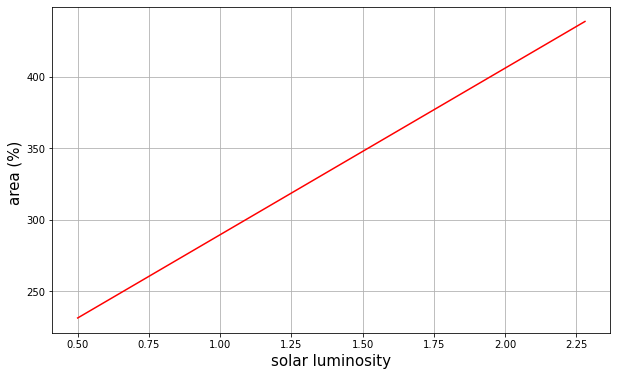

In [7]:
# Constants 
b = 2.2         # W m-2 K-1
beta_coef=16    # W m-2 K-1
Ι0 = 220

# Temperatures
Kelvin_offset = 273.15
T_min = 5 + Kelvin_offset
T_max = 40 + Kelvin_offset
T_ideal = 22.5 + Kelvin_offset

#Rates
gamma = 0.3 # death rate s-1

# Albedo
alb_ground = 0.25

#Area (%)
area_ground = 1

# Flux terms
S = 1366  #Solar flux constant  W m-2
sigma = 5.67032e-8 # Stefab-boltzman constant W m-2 K-4

# Flux limits and step
L_min = 0.5
L_max = 2.3
L_step = 0.02

# Arrays
L_NOLIFE = np.arange(L_min, L_max, L_step)
Tp_vec_NOLIFE = np.zeros(len(L_NOLIFE)) # planetary temperature 
Tg_vec_NOLIFE = np.zeros(len(L_NOLIFE)) # local temperature - white

for i in range(len(L_NOLIFE)):       
    # Planetary albedo
    alb_planetary = area_ground*alb_ground

    # Planetary temperature
    Tp_vec_NOLIFE[i] = (0.25*S*L_NOLIFE[i]*(1-alb_planetary)-Ι0)/(b) + Kelvin_offset# Kelvin or Celsius? 

    # Local temperatures
    Tg_vec_NOLIFE[i] = S*L_NOLIFE[i]*(alb_planetary-alb_ground)/(4*(b + beta_coef)) + Tp_vec_NOLIFE[i] # Kelvin or Celsius?
# end of for loop

# Plots 
fig = plt.figure(figsize=(10,6))
plt.xlabel('solar luminosity',fontsize=15)
plt.ylabel('area (%) ',fontsize=15)
plt.plot(L_NOLIFE, Tg_vec_NOLIFE, color='red')
plt.grid()



### For varying luminosities (plots as a function of luminosity) - Only White Daisies

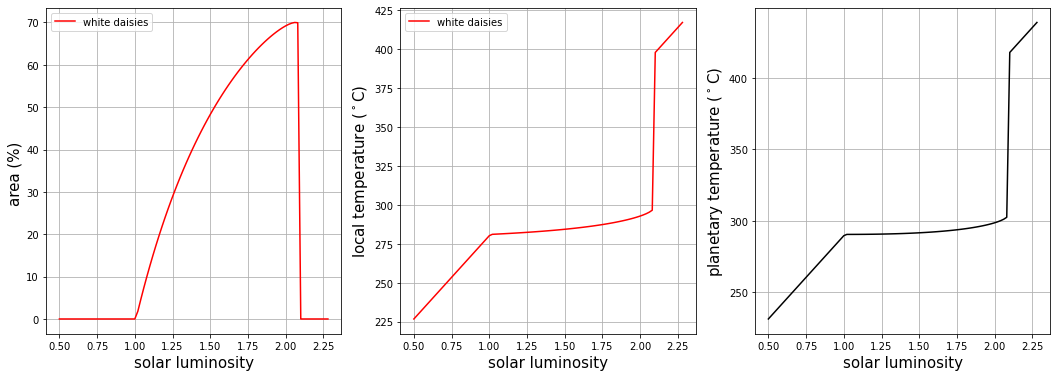

In [8]:
# Constants 
b = 2.2         # W m-2 K-1
beta_coef=16    # W m-2 K-1
Ι0 = 220

# Temperatures
Kelvin_offset = 273.15
T_min = 5 + Kelvin_offset
T_max = 40 + Kelvin_offset
T_ideal = 22.5 + Kelvin_offset

# Albedo
alb_white = 0.75
alb_black = 0.15
alb_ground = 0.25

#Area (%)
area_black = 0
area_white = 0.01

#Rates
gamma = 0.3 # death rate s-1

# Flux terms
S = 1366  #Solar flux constant  W m-2
sigma = 5.67032e-8 # Stefab-boltzman constant W m-2 K-4

# Flux limits and step
L_min = 0.5
L_max = 2.3
L_step = 0.02

# Arrays
L_ONLYWHITE = np.arange(L_min, L_max, L_step)
area_black_vec_ONLYWHITE = np.zeros(len(L_ONLYWHITE))
area_white_vec_ONLYWHITE = np.zeros(len(L_ONLYWHITE))
area_ground_vec_ONLYWHITE = np.zeros(len(L_ONLYWHITE))
Tp_vec_ONLYWHITE = np.zeros(len(L_ONLYWHITE)) # planetary temperature 
Tw_vec_ONLYWHITE = np.zeros(len(L_ONLYWHITE)) # local temperature - white
Tb_vec_ONLYWHITE = np.zeros(len(L_ONLYWHITE)) # local temperature - black
total_time = np.zeros(len(L_ONLYWHITE)) # time that daisies need to reach the steady state

# Computations
dt=0.1 # time-step
tol=1e-8  # tolerance

area_b_old=0.01
area_w_old=0.01

for i in range(len(L_ONLYWHITE)):
    
    # Initial Area (%)
    #area_black = max(area_b_old,0)
    area_white = max(area_w_old,0.01)
    area_ground = 1 - (area_white + area_black)
    
    # Initial time
    t=0
    
    # Choose an initial tolerance randomly
    #darea_b_tol = 1
    darea_w_tol = 1 

    while darea_w_tol > tol:# and darea_b_tol > tol:
        
        
        # Planetary albedo
        alb_planetary = area_ground*alb_ground + area_white*alb_white   + area_black*alb_black
        
        # Planetary temperature
        Tp_vec_ONLYWHITE[i] = (0.25*S*L_ONLYWHITE[i]*(1-alb_planetary)-Ι0)/(b) + Kelvin_offset# Kelvin or Celsius? 
        
        # Local temperatures
        Tw_vec_ONLYWHITE[i] = S*L_ONLYWHITE[i]*(alb_planetary-alb_white)/(4*(b + beta_coef)) + Tp_vec_ONLYWHITE[i] # Kelvin or Celsius?
        #Tb_vec_ONLYWHITE[i] = S*L_ONLYWHITE[i]*(alb_planetary-alb_black)/(4*(b + beta_coef)) + Tp_vec_ONLYWHITE[i] # Kelvin or Celsius?

        # Determine birth rates
        if (Tw_vec_ONLYWHITE[i] >= T_min and Tw_vec_ONLYWHITE[i] <= T_max and (area_white) >= 0.01):
            beta_white = 1 - 4*np.power(T_ideal - Tw_vec_ONLYWHITE[i], 2)/(np.power(T_max - T_min, 2))
        else:
            beta_white = 0

        #if (Tb_vec_ONLYWHITE[i] >= T_min and Tb_vec_ONLYWHITE[i] <= T_max and area_black >= 0.01):
        #    beta_black = 1 - 4*np.power(T_ideal - Tb_vec_ONLYWHITE[i], 2)/(np.power(T_max - T_min, 2))
        #else:
        #   beta_black = 0
        
        
        # New areas 
        area_white, area_black = rk4(area_white, 0, S, L_ONLYWHITE[i], dt)
        area_ground = 1 - area_white - area_black
        
        # New tolerance
        darea_b_tol = abs(area_black - area_b_old)
        darea_w_tol = abs(area_white - area_w_old)
           
        # for the next iteration 
        area_b_old = area_black
        area_w_old = area_white
        
        # Time
        t=t+dt
        
        # end of while loop
        
    # Fill the arrays  
    area_white_vec_ONLYWHITE[i] = area_white
    area_black_vec_ONLYWHITE[i] = area_black
    area_ground_vec_ONLYWHITE[i] = area_ground
    total_time[i] = t
#print(total_time)   
# end of for loop

# Plots 
fig, axs = plt.subplots(1, 3,figsize=(18,6))
axs[0].set_xlabel('solar luminosity',fontsize=15)
axs[0].set_ylabel('area (%) ',fontsize=15)
axs[0].plot(L_ONLYWHITE, 100*area_white_vec_ONLYWHITE, color='red', label='white daisies')
axs[0].grid()
axs[0].legend()

axs[1].set_xlabel('solar luminosity',fontsize=15)
axs[1].set_ylabel('local temperature ($^\circ$C)' ,fontsize=15)
axs[1].plot(L_ONLYWHITE, Tw_vec_ONLYWHITE, color='red', label='white daisies')
axs[1].grid()
axs[1].legend()

axs[2].set_xlabel('solar luminosity',fontsize=15)
axs[2].set_ylabel('planetary temperature ($^\circ$C)' ,fontsize=15)
axs[2].plot(L_ONLYWHITE, Tp_vec_ONLYWHITE, color='black')
axs[2].grid()

### For varying luminosities (plots as a function of luminosity) - Only Black Daisies

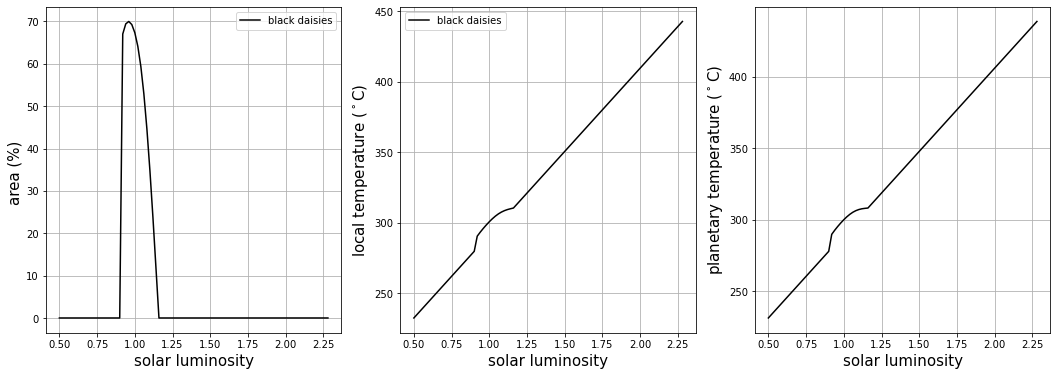

In [9]:
# Constants 
b = 2.2         # W m-2 K-1
beta_coef=16    # W m-2 K-1
Ι0 = 220

# Temperatures
Kelvin_offset = 273.15
T_min = 5 + Kelvin_offset
T_max = 40 + Kelvin_offset
T_ideal = 22.5 + Kelvin_offset

# Albedo
alb_white = 0.75
alb_black = 0.15
alb_ground = 0.25

#Area (%)
area_black = 0.01
area_white = 0

#Rates
gamma = 0.3 # death rate s-1

# Flux terms
S = 1366  #Solar flux constant  W m-2
sigma = 5.67032e-8 # Stefab-boltzman constant W m-2 K-4

# Flux limits and step
L_min = 0.5
L_max = 2.3
L_step = 0.02

# Arrays
L_ONLYBLACK = np.arange(L_min, L_max, L_step)
area_black_vec_ONLYBLACK = np.zeros(len(L_ONLYBLACK))
area_white_vec_ONLYBLACK = np.zeros(len(L_ONLYBLACK))
area_ground_vec_ONLYBLACK = np.zeros(len(L_ONLYBLACK))
Tp_vec_ONLYBLACK = np.zeros(len(L_ONLYBLACK)) # planetary temperature 
Tw_vec_ONLYBLACK = np.zeros(len(L_ONLYBLACK)) # local temperature - white
Tb_vec_ONLYBLACK = np.zeros(len(L_ONLYBLACK)) # local temperature - black
total_time = np.zeros(len(L_ONLYBLACK)) # time that daisies need to reach the steady state

# Computations
dt=0.1 # time-step
tol=1e-8  # tolerance

area_b_old=0.01
#area_w_old=1

for i in range(len(L_ONLYBLACK)):
    
    # Initial Area (%)
    area_black = max(area_b_old,0.01)
    #area_white = max(area_w_old,0.01)
    area_ground = 1 - (area_black + area_white)
    
    # Initial time
    t=0
    
    # Choose an initial tolerance randomly
    darea_b_tol = 1
    #darea_w_tol = 1 

    while darea_b_tol > tol:# and darea_b_tol > tol:
        
        
        # Planetary albedo
        alb_planetary = area_ground*alb_ground + area_black*alb_black +area_white*alb_white  
        
        # Planetary temperature
        Tp_vec_ONLYBLACK[i] = (0.25*S*L_ONLYBLACK[i]*(1-alb_planetary)-Ι0)/(b) + Kelvin_offset# Kelvin or Celsius? 
        
        # Local temperatures
        #Tw_vec_ONLYBLACK[i] = S*L_ONLYBLACK[i]*(alb_planetary-alb_white)/(4*(b + beta_coef)) + Tp_vec_ONLYBLACK[i] # Kelvin or Celsius?
        Tb_vec_ONLYBLACK[i] = S*L_ONLYBLACK[i]*(alb_planetary-alb_black)/(4*(b + beta_coef)) + Tp_vec_ONLYBLACK[i] # Kelvin or Celsius?

        # Determine birth rates
        #if (Tw_vec_ONLYBLACK[i] >= T_min and Tw_vec_ONLYBLACK[i] <= T_max and (area_white) >= 0.01):
        #    beta_white = 1 - 4*np.power(T_ideal - Tw_vec_ONLYBLACK[i], 2)/(np.power(T_max - T_min, 2))
        #else:
        #    beta_white = 0

        if (Tb_vec_ONLYBLACK[i] >= T_min and Tb_vec_ONLYBLACK[i] <= T_max and area_black >= 0.01):
            beta_black = 1 - 4*np.power(T_ideal - Tb_vec_ONLYBLACK[i], 2)/(np.power(T_max - T_min, 2))
        else:
            beta_black = 0
        
        
        # New areas 
        area_white, area_black = rk4(0, area_black, S, L_ONLYBLACK[i], dt)
        area_ground = 1 - area_white - area_black
        
        # New tolerance
        darea_b_tol = abs(area_black - area_b_old)
        darea_w_tol = abs(area_white - area_w_old)
           
        # for the next iteration 
        area_b_old = area_black
        area_w_old = area_white
        
        # Time
        t=t+dt
        
        # end of while loop
        
    # Fill the arrays  
    area_white_vec_ONLYBLACK[i] = area_white
    area_black_vec_ONLYBLACK[i] = area_black
    area_ground_vec_ONLYBLACK[i] = area_ground
    total_time[i] = t
#print(total_time)   
# end of for loop

# Plots 
fig, axs = plt.subplots(1, 3,figsize=(18,6))
axs[0].set_xlabel('solar luminosity',fontsize=15)
axs[0].set_ylabel('area (%) ',fontsize=15)
axs[0].plot(L_ONLYBLACK, 100*area_black_vec_ONLYBLACK, color='black', label='black daisies')
axs[0].grid()
axs[0].legend()

axs[1].set_xlabel('solar luminosity',fontsize=15)
axs[1].set_ylabel('local temperature ($^\circ$C)' ,fontsize=15)
axs[1].plot(L_ONLYBLACK, Tb_vec_ONLYBLACK, color='black', label='black daisies')
axs[1].grid()
axs[1].legend()

axs[2].set_xlabel('solar luminosity',fontsize=15)
axs[2].set_ylabel('planetary temperature ($^\circ$C)' ,fontsize=15)
axs[2].plot(L_ONLYBLACK, Tp_vec_ONLYBLACK, color='black')
axs[2].grid()

### For varying luminosities (plots as a function of luminosity) - Black and White Daisies

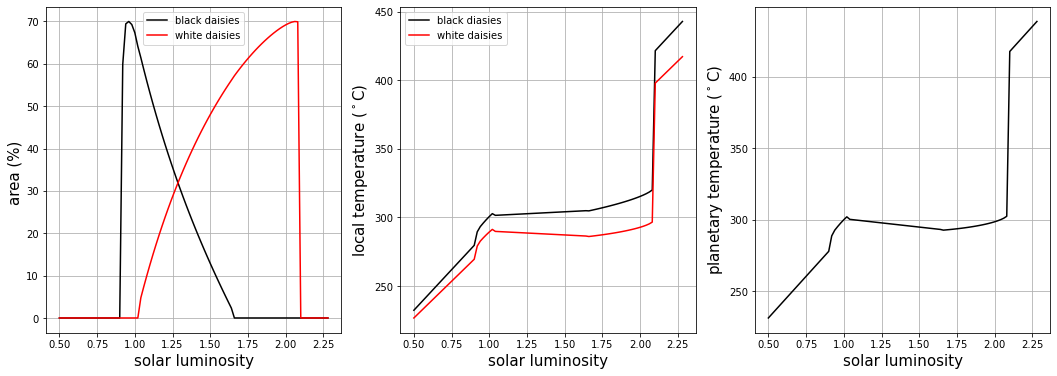

In [10]:
# Constants 
b = 2.2         # W m-2 K-1
beta_coef=16    # W m-2 K-1
Ι0 = 220

# Temperatures
Kelvin_offset = 273.15
T_min = 5 + Kelvin_offset
T_max = 40 + Kelvin_offset
T_ideal = 22.5 + Kelvin_offset

# Albedo
alb_white = 0.75
alb_black = 0.15
alb_ground = 0.25

#Area (%)
area_black = 0.01
area_white = 0.01

#Rates
gamma = 0.3 # death rate s-1

# Flux terms
S = 1366  #Solar flux constant  W m-2
sigma = 5.67032e-8 # Stefab-boltzman constant W m-2 K-4

# Flux limits and step
L_min = 0.5
L_max = 2.3
L_step = 0.02

# Arrays
L = np.arange(L_min, L_max, L_step)
area_black_vec = np.zeros(len(L))
area_white_vec = np.zeros(len(L))
area_ground_vec = np.zeros(len(L))
Tp_vec = np.zeros(len(L)) # planetary temperature 
Tw_vec = np.zeros(len(L)) # local temperature - white
Tb_vec = np.zeros(len(L)) # local temperature - black
total_time = np.zeros(len(L)) # time that daisies need to reach the steady state

# Computations
dt=0.1 # time-step
tol=1e-8  # tolerance

area_b_old=0.01
area_w_old=0.01

for i in range(len(L)):
    
    # Initial Area (%)
    area_black = max(area_b_old,0.01)
    area_white = max(area_w_old,0.01)
    area_ground = 1 - (area_black + area_white)
    
    # Initial time
    t=0
    
    # Choose an initial tolerance randomly
    darea_b_tol = 1
    darea_w_tol = 1 

    while darea_w_tol > tol and darea_b_tol > tol:
        
        
        # Planetary albedo
        alb_planetary = area_ground*alb_ground + area_white*alb_white + area_black*alb_black  
        
        # Planetary temperature
        Tp_vec[i] = (0.25*S*L[i]*(1-alb_planetary)-Ι0)/(b) + Kelvin_offset# Kelvin or Celsius? 
        
        # Local temperatures
        Tw_vec[i] = S*L[i]*(alb_planetary-alb_white)/(4*(b + beta_coef)) + Tp_vec[i] # Kelvin or Celsius?
        Tb_vec[i] = S*L[i]*(alb_planetary-alb_black)/(4*(b + beta_coef)) + Tp_vec[i] # Kelvin or Celsius?

        # Determine birth rates
        if (Tw_vec[i] >= T_min and Tw_vec[i] <= T_max and (area_white) >= 0.01):
            beta_white = 1 - 4*np.power(T_ideal - Tw_vec[i], 2)/(np.power(T_max - T_min, 2))
        else:
            beta_white = 0

        if (Tb_vec[i] >= T_min and Tb_vec[i] <= T_max and area_black >= 0.01):
            beta_black = 1 - 4*np.power(T_ideal - Tb_vec[i], 2)/(np.power(T_max - T_min, 2))
        else:
            beta_black = 0
        
        
        # New areas 
        area_white, area_black = rk4(area_white, area_black, S, L[i], dt)
        area_ground = 1 - area_white - area_black
        
        # New tolerance
        darea_b_tol = abs(area_black - area_b_old)
        darea_w_tol = abs(area_white - area_w_old)
           
        # for the next iteration 
        area_b_old = area_black
        area_w_old = area_white
        
        # Time
        t=t+dt
        
        # end of while loop
        
    # Fill the arrays  
    area_white_vec[i] = area_white
    area_black_vec[i] = area_black
    area_ground_vec[i] = area_ground
    total_time[i] = t
#print(total_time)   
# end of for loop

# Plots 
fig, axs = plt.subplots(1, 3,figsize=(18,6))
axs[0].set_xlabel('solar luminosity',fontsize=15)
axs[0].set_ylabel('area (%) ',fontsize=15)
axs[0].plot(L, 100*area_black_vec, color='black', label='black daisies')
axs[0].plot(L, 100*area_white_vec, color='red', label='white daisies')
axs[0].grid()
axs[0].legend()

axs[1].set_xlabel('solar luminosity',fontsize=15)
axs[1].set_ylabel('local temperature ($^\circ$C)' ,fontsize=15)
axs[1].plot(L, Tb_vec, color='black', label='black diasies')
axs[1].plot(L, Tw_vec, color='red', label='white daisies')
axs[1].grid()
axs[1].legend()

axs[2].set_xlabel('solar luminosity',fontsize=15)
axs[2].set_ylabel('planetary temperature ($^\circ$C)' ,fontsize=15)
axs[2].plot(L, Tp_vec, color='black')
axs[2].grid()

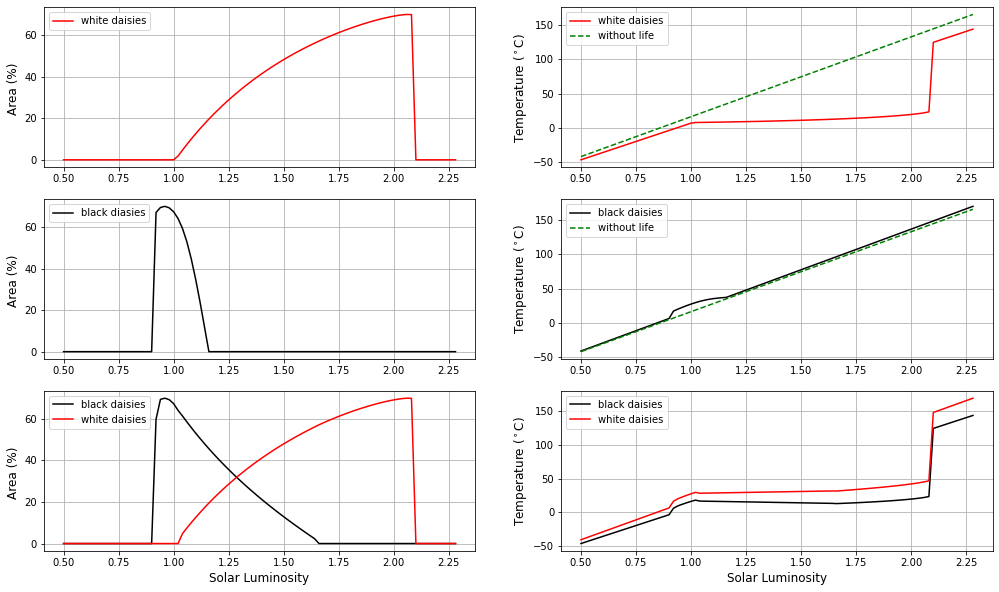

In [11]:
# Plots 
fig, axs = plt.subplots(3, 2,figsize=(17,10))
#axs[0,0].set_xlabel('solar luminosity',fontsize=12)
axs[0,0].set_ylabel('Area (%) ',fontsize=12)
axs[0,0].plot(L_ONLYWHITE, 100*area_white_vec_ONLYWHITE, color='red', label='white daisies')
axs[0,0].grid()
axs[0,0].legend(loc=2)

#axs[1,0].set_xlabel('solar luminosity',fontsize=12)
axs[1,0].set_ylabel('Area (%) ' ,fontsize=12)
axs[1,0].plot(L_ONLYBLACK, 100*area_black_vec_ONLYBLACK, color='black', label='black diasies')
axs[1,0].grid()
axs[1,0].legend(loc=2)

axs[2,0].set_xlabel('Solar Luminosity',fontsize=12)
axs[2,0].set_ylabel('Area (%) ',fontsize=12)
axs[2,0].plot(L, 100*area_black_vec, color='black', label='black daisies')
axs[2,0].plot(L, 100*area_white_vec, color='red', label='white daisies')
axs[2,0].grid()
axs[2,0].legend(loc=2)

#-------------------------------------------------
#axs[0,1].set_xlabel('solar luminosity',fontsize=12)
axs[0,1].set_ylabel('Temperature ($^\circ$C) ',fontsize=12)
axs[0,1].plot(L_ONLYWHITE, Tw_vec_ONLYWHITE - Kelvin_offset, color='red', label='white daisies')
axs[0,1].plot(L_NOLIFE, Tg_vec_NOLIFE - Kelvin_offset, 'g--', label='without life')
axs[0,1].grid()
axs[0,1].legend(loc=2)

#axs[1,1].set_xlabel('solar luminosity',fontsize=12)
axs[1,1].set_ylabel('Temperature ($^\circ$C)' ,fontsize=12)
axs[1,1].plot(L_ONLYBLACK, Tb_vec_ONLYBLACK - Kelvin_offset, color='black', label='black daisies')
axs[1,1].plot(L_NOLIFE, Tg_vec_NOLIFE - Kelvin_offset, 'g--', label='without life')
axs[1,1].grid()
axs[1,1].legend(loc=2)

axs[2,1].set_xlabel('Solar Luminosity',fontsize=12)
axs[2,1].set_ylabel('Temperature ($^\circ$C) ',fontsize=12)
axs[2,1].plot(L, Tw_vec - Kelvin_offset, color='black', label='black daisies')
axs[2,1].plot(L, Tb_vec - Kelvin_offset, color='red', label='white daisies')
#axs[2,1].plot(L, Tp_vec - Kelvin_offset, color='red', label='Planetary temperature')
#axs[2,1].plot(L_NOLIFE, Tg_vec_NOLIFE - Kelvin_offset, 'g--', label='without life')
axs[2,1].grid()
axs[2,1].legend(loc=2)

#fig.savefig('area_temp_warming.png')

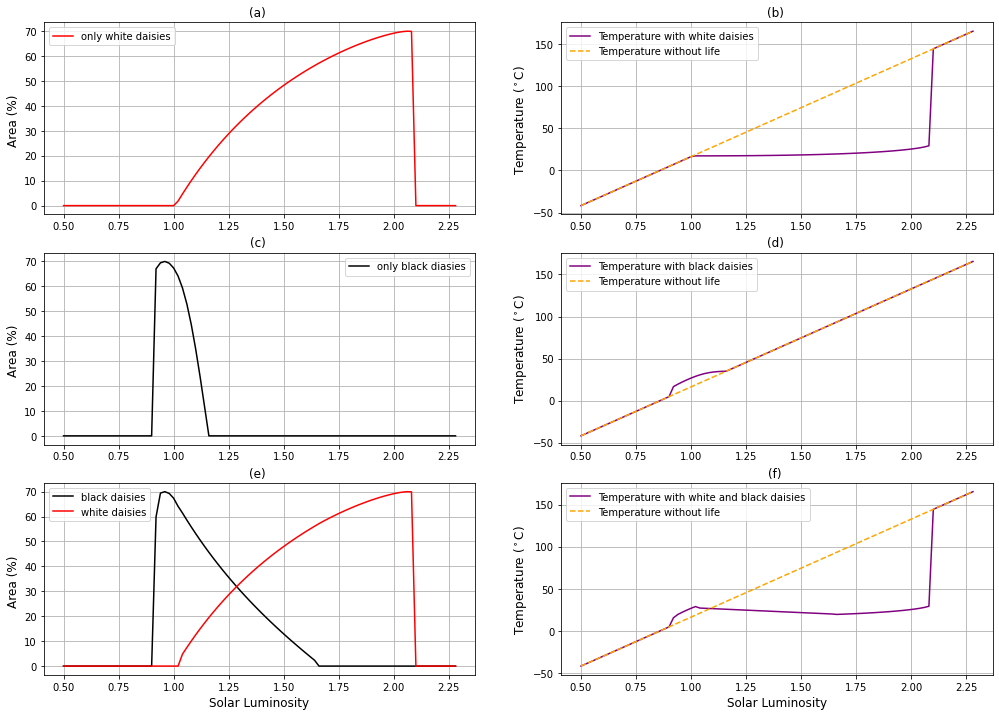

In [12]:
# Plots 
fig, axs = plt.subplots(3, 2,figsize=(17,12))
#axs[0,0].set_xlabel('solar luminosity',fontsize=12)
axs[0,0].set_ylabel('Area (%) ',fontsize=12)
axs[0,0].set_title('(a) ',fontsize=12)
axs[0,0].plot(L_ONLYWHITE, 100*area_white_vec_ONLYWHITE, color='red', label='only white daisies')
axs[0,0].grid()
axs[0,0].legend(loc=2)

#axs[1,0].set_xlabel('solar luminosity',fontsize=12)
axs[1,0].set_ylabel('Area (%) ' ,fontsize=12)
axs[1,0].set_title('(c) ',fontsize=12)
axs[1,0].plot(L_ONLYBLACK, 100*area_black_vec_ONLYBLACK, color='black', label='only black diasies')
axs[1,0].grid()
axs[1,0].legend(loc=1)

axs[2,0].set_xlabel('Solar Luminosity',fontsize=12)
axs[2,0].set_ylabel('Area (%) ',fontsize=12)
axs[2,0].set_title('(e) ',fontsize=12)
axs[2,0].plot(L, 100*area_black_vec, color='black', label='black daisies')
axs[2,0].plot(L, 100*area_white_vec, color='red', label='white daisies')
axs[2,0].grid()
axs[2,0].legend(loc=2)

#-------------------------------------------------
#axs[0,1].set_xlabel('solar luminosity',fontsize=12)
axs[0,1].set_ylabel('Temperature ($^\circ$C) ',fontsize=12)
axs[0,1].set_title('(b) ',fontsize=12)
axs[0,1].plot(L_ONLYWHITE, Tp_vec_ONLYWHITE - Kelvin_offset, color='purple', label='Temperature with white daisies')
axs[0,1].plot(L_NOLIFE, Tp_vec_NOLIFE - Kelvin_offset, linestyle='dashed',color='orange', label='Temperature without life')
axs[0,1].grid()
axs[0,1].legend(loc=2)

#axs[1,1].set_xlabel('solar luminosity',fontsize=12)
axs[1,1].set_ylabel('Temperature ($^\circ$C)' ,fontsize=12)
axs[1,1].set_title('(d) ',fontsize=12)
axs[1,1].plot(L_ONLYBLACK, Tp_vec_ONLYBLACK - Kelvin_offset, color='purple', label='Temperature with black daisies')
axs[1,1].plot(L_NOLIFE, Tp_vec_NOLIFE - Kelvin_offset,  linestyle='dashed',color='orange', label='Temperature without life')
axs[1,1].grid()
axs[1,1].legend(loc=2)

axs[2,1].set_xlabel('Solar Luminosity',fontsize=12)
axs[2,1].set_ylabel('Temperature ($^\circ$C) ',fontsize=12)
axs[2,1].set_title('(f) ',fontsize=12)
#axs[2,1].plot(L, Tw_vec - Kelvin_offset, color='black', label='black daisies')
#axs[2,1].plot(L, Tb_vec - Kelvin_offset, color='red', label='white daisies')
axs[2,1].plot(L, Tp_vec - Kelvin_offset, color='purple', label='Temperature with white and black daisies')
axs[2,1].plot(L_NOLIFE, Tp_vec_NOLIFE - Kelvin_offset,  linestyle='dashed',color='orange', label='Temperature without life')
axs[2,1].grid()
axs[2,1].legend(loc=2)

#fig.savefig('area_temp_warming.png')

### Daisies' population stucture for different luminosities (Map plot)

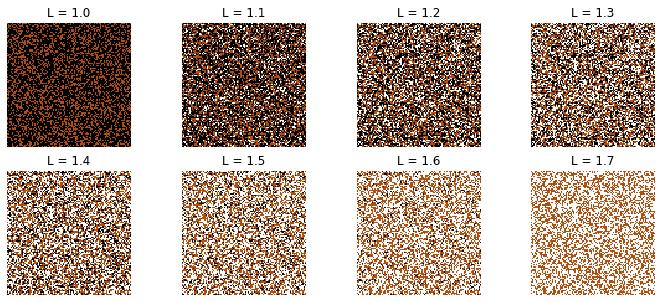

In [8]:
#https://stackoverflow.com/questions/9707676/defining-a-discrete-colormap-for-imshow-in-matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

fig, axs = plt.subplots(2, 4,figsize=(12,5))

p_white = area_white_vec[25]
p_black = area_black_vec[25]
np.random.seed(101) # this generates the same output every time.
zvals = np.random.rand(100, 100) * 1  # return a sample from the “standard normal” distribution.

# make a color map of fixed colors
cmap = colors.ListedColormap(['white', 'black', 'xkcd:burnt sienna'])
bounds=[0,p_white,p_black+p_white,1] # points which are < p_white will be colored white
                                        # points which are > p_white and < p_black+p_white will be colored black
norm = colors.BoundaryNorm(bounds, cmap.N)

# tell imshow about color map so that only set colors are used
axs[0,0].set_title('L = 1.0')
axs[0,0].axis('off')
img = axs[0,0].imshow(zvals, interpolation='nearest', origin='lower',
                    cmap=cmap, norm=norm)
# make a color bar
#plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=[0, 5, 10])

######################################################
p_white = area_white_vec[30]
p_black = area_black_vec[30]
np.random.seed(101)
zvals = np.random.rand(100, 100) * 1

# make a color map of fixed colors
cmap = colors.ListedColormap(['white', 'black', 'xkcd:burnt sienna'])
bounds=[0,p_white,p_black+p_white,1]
norm = colors.BoundaryNorm(bounds, cmap.N)

# tell imshow about color map so that only set colors are used
axs[0,1].set_title('L = 1.1')
axs[0,1].axis('off')
img = axs[0,1].imshow(zvals, interpolation='nearest', origin='lower',
                    cmap=cmap, norm=norm)

######################################################
p_white = area_white_vec[35]
p_black = area_black_vec[35]
np.random.seed(101)
zvals = np.random.rand(100, 100) * 1

# make a color map of fixed colors
cmap = colors.ListedColormap(['white', 'black', 'xkcd:burnt sienna'])
bounds=[0,p_white,p_black+p_white,1]
norm = colors.BoundaryNorm(bounds, cmap.N)

# tell imshow about color map so that only set colors are used
axs[0,2].set_title('L = 1.2')
axs[0,2].axis('off')
img = axs[0,2].imshow(zvals, interpolation='nearest', origin='lower',
                    cmap=cmap, norm=norm)

######################################################
p_white = area_white_vec[40]
p_black = area_black_vec[40]
np.random.seed(101)
zvals = np.random.rand(100, 100) * 1

# make a color map of fixed colors
cmap = colors.ListedColormap(['white', 'black', 'xkcd:burnt sienna'])
bounds=[0,p_white,p_black+p_white,1]
norm = colors.BoundaryNorm(bounds, cmap.N)

# tell imshow about color map so that only set colors are used
axs[0,3].set_title('L = 1.3')
axs[0,3].axis('off')
img = axs[0,3].imshow(zvals, interpolation='nearest', origin='lower',
                    cmap=cmap, norm=norm)


######################################################
p_white = area_white_vec[45]
p_black = area_black_vec[45]
np.random.seed(101)
zvals = np.random.rand(100, 100) * 1

# make a color map of fixed colors
cmap = colors.ListedColormap(['white', 'black', 'xkcd:burnt sienna'])
bounds=[0,p_white,p_black+p_white,1]
norm = colors.BoundaryNorm(bounds, cmap.N)

# tell imshow about color map so that only set colors are used
axs[1,0].set_title('L = 1.4')
axs[1,0].axis('off')
img = axs[1,0].imshow(zvals, interpolation='nearest', origin='lower',
                    cmap=cmap, norm=norm)

######################################################
p_white = area_white_vec[50]
p_black = area_black_vec[50]
np.random.seed(101)
zvals = np.random.rand(100, 100) * 1

# make a color map of fixed colors
cmap = colors.ListedColormap(['white', 'black', 'xkcd:burnt sienna'])
bounds=[0,p_white,p_black+p_white,1]
norm = colors.BoundaryNorm(bounds, cmap.N)

# tell imshow about color map so that only set colors are used
axs[1,1].set_title('L = 1.5')
axs[1,1].axis('off')
img = axs[1,1].imshow(zvals, interpolation='nearest', origin='lower',
                    cmap=cmap, norm=norm)

######################################################
p_white = area_white_vec[55]
p_black = area_black_vec[55]
np.random.seed(101)
zvals = np.random.rand(100, 100) * 1

# make a color map of fixed colors
cmap = colors.ListedColormap(['white', 'black', 'xkcd:burnt sienna'])
bounds=[0,p_white,p_black+p_white,1]
norm = colors.BoundaryNorm(bounds, cmap.N)

# tell imshow about color map so that only set colors are used
axs[1,2].set_title('L = 1.6')
axs[1,2].axis('off')
img = axs[1,2].imshow(zvals, interpolation='nearest', origin='lower',
                    cmap=cmap, norm=norm)

######################################################
p_white = area_white_vec[60]
p_black = area_black_vec[60]
np.random.seed(101)
zvals = np.random.rand(100, 100) * 1

# make a color map of fixed colors
cmap = colors.ListedColormap(['white', 'black', 'xkcd:burnt sienna'])
bounds=[0,p_white,p_black+p_white,1]
norm = colors.BoundaryNorm(bounds, cmap.N)

# tell imshow about color map so that only set colors are used
axs[1,3].set_title('L = 1.7')
axs[1,3].axis('off')
img = axs[1,3].imshow(zvals, interpolation='nearest', origin='lower',
                    cmap=cmap, norm=norm)

plt.show()

fig.savefig('population_warming.png')

### Growth Rate of the Daisies as a function of temperature (basic plot)

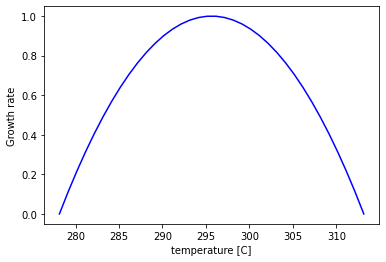

In [5]:
temp=np.arange(5,41,1)+273.15
beta=np.zeros(len(temp))
for i in range(len(temp)):
    beta[i] = 1 - 4*np.power(T_ideal - temp[i], 2)/(np.power(T_max - T_min, 2))
    
fig=plt.figure(figsize=(6, 4))
plt.xlabel('temperature [C]',fontsize=10)
plt.ylabel('Growth rate',fontsize=10)
plt.plot(temp,beta,'b')
plt.show()

### Animation

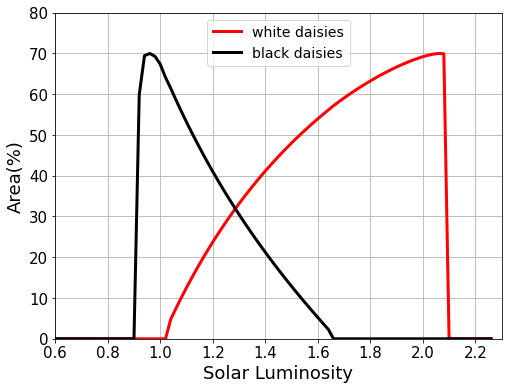

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x = L
y = 100*area_white_vec
y1 = 100*area_black_vec

fig, ax = plt.subplots(figsize=(8,6))
line, = ax.plot(x, y, color='r',linewidth=3,label='white daisies')
line1, = ax.plot(x, y1, color='k',linewidth=3,label='black daisies')
ax.set_ylabel('Area(%)',fontsize=18)
ax.set_xlabel('Solar Luminosity',fontsize=18)
ax.grid()
ax.legend(loc=9, fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize=15)

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    line.axes.axis([0.6, 2.3, 0, 80])
    line1.set_data(x[:num], y1[:num])
    line1.axes.axis([0.6, 2.3, 0, 80]) 
    return line,line1,

ani = animation.FuncAnimation(fig, update, frames=len(x), fargs=[x, y, line], interval=150, blit=True, repeat = False)
ani.save('warming.gif', writer='pillow')
plt.show()

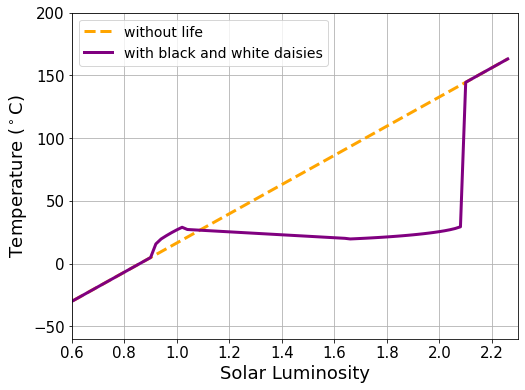

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x = L
y = Tp_vec_NOLIFE - Kelvin_offset
y1 = Tp_vec - Kelvin_offset

fig, ax = plt.subplots(figsize=(8,6))
line, = ax.plot(x, y, linestyle='dashed',color='orange',linewidth=3,label='without life')
line1, = ax.plot(x, y1, color='purple',linewidth=3,label='with black and white daisies')
ax.set_ylabel('Temperature ($^\circ$C)',fontsize=18)
ax.set_xlabel('Solar Luminosity',fontsize=18)
ax.grid()
ax.legend(loc=2, fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=15)

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    line.axes.axis([0.6, 2.3, -60, 200])
    line1.set_data(x[:num], y1[:num])
    line1.axes.axis([0.6, 2.3, -60, 200]) 
    return line,line1,

ani = animation.FuncAnimation(fig, update, frames=len(x), fargs=[x, y, line], interval=150, blit=True, repeat = False)
ani.save('warming_temp.gif', writer='pillow')
plt.show()

## ----- Cooling planet -----

### For varying luminosities (plots as a function of luminosity) - Without life

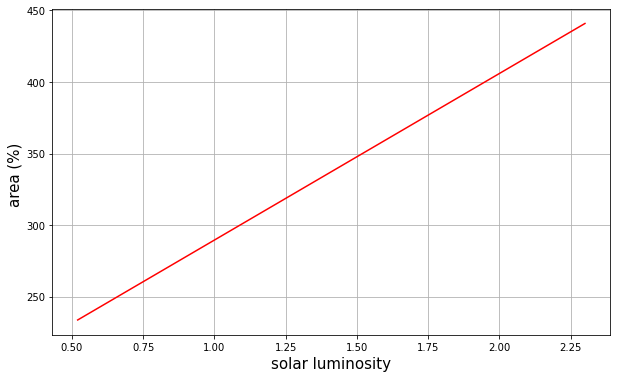

In [40]:
# Constants 
b = 2.2         # W m-2 K-1
beta_coef=16    # W m-2 K-1
Ι0 = 220

# Temperatures
Kelvin_offset = 273.15
T_min = 5 + Kelvin_offset
T_max = 40 + Kelvin_offset
T_ideal = 22.5 + Kelvin_offset

#Rates
gamma = 0.3 # death rate s-1

# Albedo
alb_ground = 0.25

#Area (%)
area_ground = 1

# Flux terms
S = 1366  #Solar flux constant  W m-2
sigma = 5.67032e-8 # Stefab-boltzman constant W m-2 K-4

# Flux limits and step
L_min = 0.5
L_max = 2.3
L_step = 0.02

# Arrays
L_NOLIFE = np.arange(L_max, L_min, -L_step)
Tp_vec_NOLIFE = np.zeros(len(L_NOLIFE)) # planetary temperature 
Tg_vec_NOLIFE = np.zeros(len(L_NOLIFE)) # local temperature - white

for i in range(len(L_NOLIFE)):       
    # Planetary albedo
    alb_planetary = area_ground*alb_ground

    # Planetary temperature
    Tp_vec_NOLIFE[i] = (0.25*S*L_NOLIFE[i]*(1-alb_planetary)-Ι0)/(b) + Kelvin_offset# Kelvin or Celsius? 

    # Local temperatures
    Tg_vec_NOLIFE[i] = S*L_NOLIFE[i]*(alb_planetary-alb_ground)/(4*(b + beta_coef)) + Tp_vec_NOLIFE[i] # Kelvin or Celsius?
# end of for loop

# Plots 
fig = plt.figure(figsize=(10,6))
plt.xlabel('solar luminosity',fontsize=15)
plt.ylabel('area (%) ',fontsize=15)
plt.plot(L_NOLIFE, Tg_vec_NOLIFE, color='red')
plt.grid()



### For varying luminosities (plots as a function of luminosity) - Only White Daisies

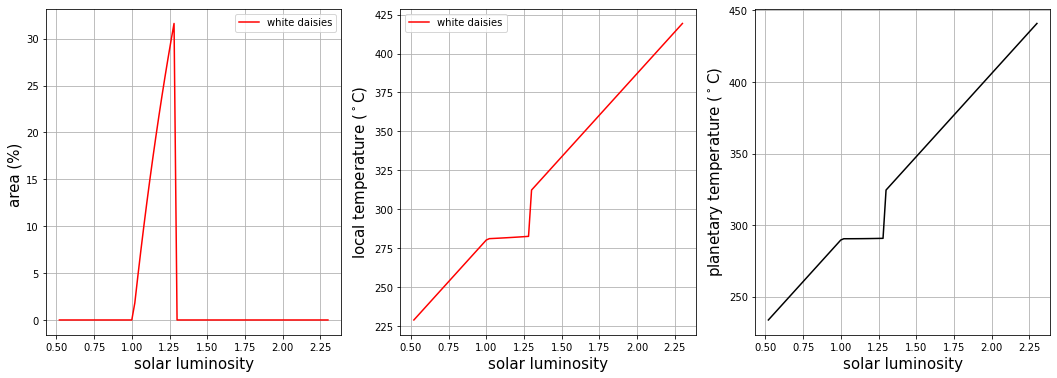

In [41]:
# Constants 
b = 2.2         # W m-2 K-1
beta_coef=16    # W m-2 K-1
Ι0 = 220

# Temperatures
Kelvin_offset = 273.15
T_min = 5 + Kelvin_offset
T_max = 40 + Kelvin_offset
T_ideal = 22.5 + Kelvin_offset

# Albedo
alb_white = 0.75
alb_black = 0.15
alb_ground = 0.25

#Area (%)
area_black = 0
area_white = 0.01

#Rates
gamma = 0.3 # death rate s-1

# Flux terms
S = 1366  #Solar flux constant  W m-2
sigma = 5.67032e-8 # Stefab-boltzman constant W m-2 K-4

# Flux limits and step
L_min = 0.5
L_max = 2.3
L_step = 0.02

# Arrays
L_ONLYWHITE = np.arange(L_max, L_min, -L_step)
area_black_vec_ONLYWHITE = np.zeros(len(L_ONLYWHITE))
area_white_vec_ONLYWHITE = np.zeros(len(L_ONLYWHITE))
area_ground_vec_ONLYWHITE = np.zeros(len(L_ONLYWHITE))
Tp_vec_ONLYWHITE = np.zeros(len(L_ONLYWHITE)) # planetary temperature 
Tw_vec_ONLYWHITE = np.zeros(len(L_ONLYWHITE)) # local temperature - white
Tb_vec_ONLYWHITE = np.zeros(len(L_ONLYWHITE)) # local temperature - black
total_time = np.zeros(len(L_ONLYWHITE)) # time that daisies need to reach the steady state

# Computations
dt=0.1 # time-step
tol=1e-8  # tolerance

#area_b_old=0
area_w_old=0.01

for i in range(len(L_ONLYWHITE)):
    
    # Initial Area (%)
    #area_black = max(area_b_old,0)
    area_white = max(area_w_old,0.01)
    area_ground = 1 - (area_white + area_black)
    
    # Initial time
    t=0
    
    # Choose an initial tolerance randomly
    #darea_b_tol = 1
    darea_w_tol = 1 

    while darea_w_tol > tol:# and darea_b_tol > tol:
        
        
        # Planetary albedo
        alb_planetary = area_ground*alb_ground + area_white*alb_white   + area_black*alb_black
        
        # Planetary temperature
        Tp_vec_ONLYWHITE[i] = (0.25*S*L_ONLYWHITE[i]*(1-alb_planetary)-Ι0)/(b) + Kelvin_offset# Kelvin or Celsius? 
        
        # Local temperatures
        Tw_vec_ONLYWHITE[i] = S*L_ONLYWHITE[i]*(alb_planetary-alb_white)/(4*(b + beta_coef)) + Tp_vec_ONLYWHITE[i] # Kelvin or Celsius?
        #Tb_vec_ONLYWHITE[i] = S*L_ONLYWHITE[i]*(alb_planetary-alb_black)/(4*(b + beta_coef)) + Tp_vec_ONLYWHITE[i] # Kelvin or Celsius?

        # Determine birth rates
        if (Tw_vec_ONLYWHITE[i] >= T_min and Tw_vec_ONLYWHITE[i] <= T_max and (area_white) >= 0.01):
            beta_white = 1 - 4*np.power(T_ideal - Tw_vec_ONLYWHITE[i], 2)/(np.power(T_max - T_min, 2))
        else:
            beta_white = 0

        #if (Tb_vec_ONLYWHITE[i] >= T_min and Tb_vec_ONLYWHITE[i] <= T_max and area_black >= 0.01):
        #    beta_black = 1 - 4*np.power(T_ideal - Tb_vec_ONLYWHITE[i], 2)/(np.power(T_max - T_min, 2))
        #else:
        #   beta_black = 0
        
        
        # New areas 
        area_white, area_black = rk4(area_white, 0, S, L_ONLYWHITE[i], dt)
        area_ground = 1 - area_white - area_black
        
        # New tolerance
        darea_b_tol = abs(area_black - area_b_old)
        darea_w_tol = abs(area_white - area_w_old)
           
        # for the next iteration 
        area_b_old = area_black
        area_w_old = area_white
        
        # Time
        t=t+dt
        
        # end of while loop
        
    # Fill the arrays  
    area_white_vec_ONLYWHITE[i] = area_white
    area_black_vec_ONLYWHITE[i] = area_black
    area_ground_vec_ONLYWHITE[i] = area_ground
    total_time[i] = t
#print(total_time)   
# end of for loop

# Plots 
fig, axs = plt.subplots(1, 3,figsize=(18,6))
axs[0].set_xlabel('solar luminosity',fontsize=15)
axs[0].set_ylabel('area (%) ',fontsize=15)
axs[0].plot(L_ONLYWHITE, 100*area_white_vec_ONLYWHITE, color='red', label='white daisies')
axs[0].grid()
axs[0].legend()

axs[1].set_xlabel('solar luminosity',fontsize=15)
axs[1].set_ylabel('local temperature ($^\circ$C)' ,fontsize=15)
axs[1].plot(L_ONLYWHITE, Tw_vec_ONLYWHITE, color='red', label='white daisies')
axs[1].grid()
axs[1].legend()

axs[2].set_xlabel('solar luminosity',fontsize=15)
axs[2].set_ylabel('planetary temperature ($^\circ$C)' ,fontsize=15)
axs[2].plot(L_ONLYWHITE, Tp_vec_ONLYWHITE, color='black')
axs[2].grid()

### For varying luminosities (plots as a function of luminosity) - Only Black Daisies

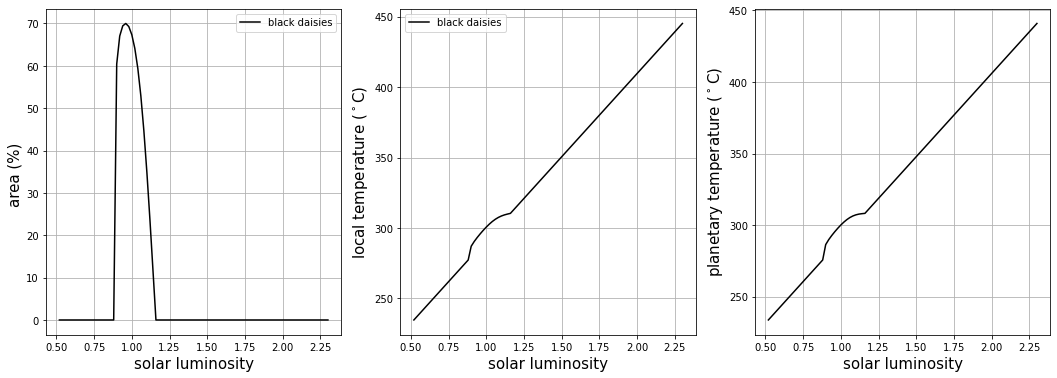

In [42]:
# Constants 
b = 2.2         # W m-2 K-1
beta_coef=16    # W m-2 K-1
Ι0 = 220

# Temperatures
Kelvin_offset = 273.15
T_min = 5 + Kelvin_offset
T_max = 40 + Kelvin_offset
T_ideal = 22.5 + Kelvin_offset

# Albedo
alb_white = 0.75
alb_black = 0.15
alb_ground = 0.25

#Area (%)
area_black = 0.01
area_white = 0

#Rates
gamma = 0.3 # death rate s-1

# Flux terms
S = 1366  #Solar flux constant  W m-2
sigma = 5.67032e-8 # Stefab-boltzman constant W m-2 K-4

# Flux limits and step
L_min = 0.5
L_max = 2.3
L_step = 0.02

# Arrays
L_ONLYBLACK = np.arange(L_max, L_min, -L_step)
area_black_vec_ONLYBLACK = np.zeros(len(L_ONLYBLACK))
area_white_vec_ONLYBLACK = np.zeros(len(L_ONLYBLACK))
area_ground_vec_ONLYBLACK = np.zeros(len(L_ONLYBLACK))
Tp_vec_ONLYBLACK = np.zeros(len(L_ONLYBLACK)) # planetary temperature 
Tw_vec_ONLYBLACK = np.zeros(len(L_ONLYBLACK)) # local temperature - white
Tb_vec_ONLYBLACK = np.zeros(len(L_ONLYBLACK)) # local temperature - black
total_time = np.zeros(len(L_ONLYBLACK)) # time that daisies need to reach the steady state

# Computations
dt=0.1 # time-step
tol=1e-8  # tolerance

area_b_old=0.01
#area_w_old=1

for i in range(len(L_ONLYBLACK)):
    
    # Initial Area (%)
    area_black = max(area_b_old,0.01)
    #area_white = max(area_w_old,0.01)
    area_ground = 1 - (area_black + area_white)
    
    # Initial time
    t=0
    
    # Choose an initial tolerance randomly
    darea_b_tol = 1
    #darea_w_tol = 1 

    while darea_b_tol > tol:# and darea_b_tol > tol:
        
        
        # Planetary albedo
        alb_planetary = area_ground*alb_ground + area_black*alb_black +area_white*alb_white  
        
        # Planetary temperature
        Tp_vec_ONLYBLACK[i] = (0.25*S*L_ONLYBLACK[i]*(1-alb_planetary)-Ι0)/(b) + Kelvin_offset# Kelvin or Celsius? 
        
        # Local temperatures
        #Tw_vec_ONLYBLACK[i] = S*L_ONLYBLACK[i]*(alb_planetary-alb_white)/(4*(b + beta_coef)) + Tp_vec_ONLYBLACK[i] # Kelvin or Celsius?
        Tb_vec_ONLYBLACK[i] = S*L_ONLYBLACK[i]*(alb_planetary-alb_black)/(4*(b + beta_coef)) + Tp_vec_ONLYBLACK[i] # Kelvin or Celsius?

        # Determine birth rates
        #if (Tw_vec_ONLYBLACK[i] >= T_min and Tw_vec_ONLYBLACK[i] <= T_max and (area_white) >= 0.01):
        #    beta_white = 1 - 4*np.power(T_ideal - Tw_vec_ONLYBLACK[i], 2)/(np.power(T_max - T_min, 2))
        #else:
        #    beta_white = 0

        if (Tb_vec_ONLYBLACK[i] >= T_min and Tb_vec_ONLYBLACK[i] <= T_max and area_black >= 0.01):
            beta_black = 1 - 4*np.power(T_ideal - Tb_vec_ONLYBLACK[i], 2)/(np.power(T_max - T_min, 2))
        else:
            beta_black = 0
        
        
        # New areas 
        area_white, area_black = rk4(0, area_black, S, L_ONLYBLACK[i], dt)
        area_ground = 1 - area_white - area_black
        
        # New tolerance
        darea_b_tol = abs(area_black - area_b_old)
        darea_w_tol = abs(area_white - area_w_old)
           
        # for the next iteration 
        area_b_old = area_black
        area_w_old = area_white
        
        # Time
        t=t+dt
        
        # end of while loop
        
    # Fill the arrays  
    area_white_vec_ONLYBLACK[i] = area_white
    area_black_vec_ONLYBLACK[i] = area_black
    area_ground_vec_ONLYBLACK[i] = area_ground
    total_time[i] = t
#print(total_time)   
# end of for loop

# Plots 
fig, axs = plt.subplots(1, 3,figsize=(18,6))
axs[0].set_xlabel('solar luminosity',fontsize=15)
axs[0].set_ylabel('area (%) ',fontsize=15)
axs[0].plot(L_ONLYBLACK, 100*area_black_vec_ONLYBLACK, color='black', label='black daisies')
axs[0].grid()
axs[0].legend()

axs[1].set_xlabel('solar luminosity',fontsize=15)
axs[1].set_ylabel('local temperature ($^\circ$C)' ,fontsize=15)
axs[1].plot(L_ONLYBLACK, Tb_vec_ONLYBLACK, color='black', label='black daisies')
axs[1].grid()
axs[1].legend()

axs[2].set_xlabel('solar luminosity',fontsize=15)
axs[2].set_ylabel('planetary temperature ($^\circ$C)' ,fontsize=15)
axs[2].plot(L_ONLYBLACK, Tp_vec_ONLYBLACK, color='black')
axs[2].grid()

### For varying luminosities (plots as a function of luminosity) - Black and White Daisies

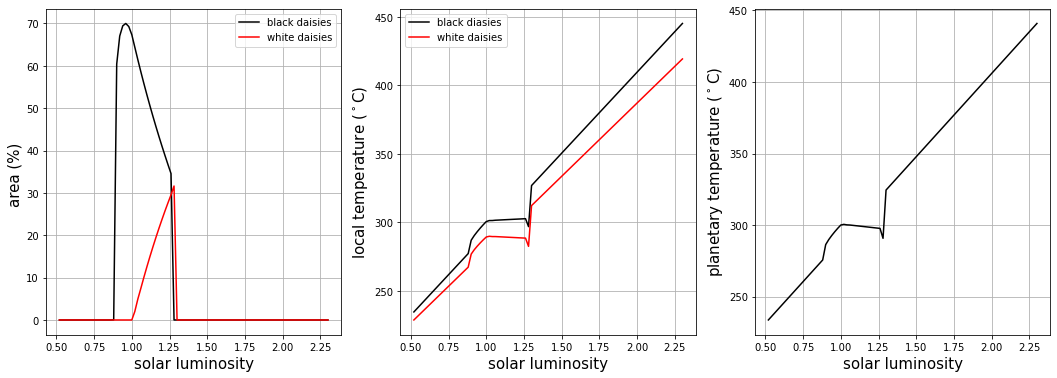

In [43]:
# Constants 
b = 2.2         # W m-2 K-1
beta_coef=16    # W m-2 K-1
Ι0 = 220

# Temperatures
Kelvin_offset = 273.15
#Kelvin_offset = 0                # ??????
T_min = 5 + Kelvin_offset
T_max = 40 + Kelvin_offset
T_ideal = 22.5 + Kelvin_offset

# Albedo
alb_white = 0.75
alb_black = 0.15
alb_ground = 0.25

#Area (%)
area_black = 0.01
area_white = 0.01

#Rates
gamma = 0.3 # death rate s-1

# Flux terms
S = 1366  #Solar flux constant  W m-2
sigma = 5.67032e-8 # Stefab-boltzman constant W m-2 K-4

# Flux limits and step
L_min = 0.5
L_max = 2.3
L_step = 0.02

# Arrays
L = np.arange(L_max, L_min, -L_step) # inverse L array
area_black_vec = np.zeros(len(L))
area_white_vec = np.zeros(len(L))
area_ground_vec = np.zeros(len(L))
Tp_vec = np.zeros(len(L)) # planetary temperature 
Tw_vec = np.zeros(len(L)) # local temperature - white
Tb_vec = np.zeros(len(L)) # local temperature - black
total_time = np.zeros(len(L)) # time that daisies need to reach the steady state

# Computations
dt=0.1 # time-step
tol=1e-8  # tolerance

area_b_old=0.01
area_w_old=0.01

for i in range(len(L)):
    
    # Initial Area (%)
    area_black = max(area_b_old,0.01)
    area_white = max(area_w_old,0.01)
    area_ground = 1 - (area_black + area_white)
    
    # Initial time
    t=0
    
    # Choose an initial tolerance randomly
    darea_b_tol = 1
    darea_w_tol = 1
    
    ###
    #area_b_old = 0
    #area_w_old = 0
    

    while darea_w_tol > tol and darea_b_tol > tol:
        
        
        # Planetary albedo
        alb_planetary = area_ground*alb_ground + area_white*alb_white + area_black*alb_black  
        
        # Planetary temperature
        Tp_vec[i] = (0.25*S*L[i]*(1-alb_planetary)-Ι0)/(b) + Kelvin_offset# Kelvin or Celsius? 
        
        # Local temperatures
        Tw_vec[i] = S*L[i]*(alb_planetary-alb_white)/(4*(b + beta_coef)) + Tp_vec[i] # Kelvin or Celsius?
        Tb_vec[i] = S*L[i]*(alb_planetary-alb_black)/(4*(b + beta_coef)) + Tp_vec[i] # Kelvin or Celsius?

        # Determine birth rates
        if (Tw_vec[i] >= T_min and Tw_vec[i] <= T_max and (area_white) >= 0.01):
            beta_white = 1 - 4*np.power(T_ideal - Tw_vec[i], 2)/(np.power(T_max - T_min, 2))
        else:
            beta_white = 0

        if (Tb_vec[i] >= T_min and Tb_vec[i] <= T_max and area_black >= 0.01):
            beta_black = 1 - 4*np.power(T_ideal - Tb_vec[i], 2)/(np.power(T_max - T_min, 2))
        else:
            beta_black = 0
        
        
        # New areas 
        area_white, area_black = rk4(area_white, area_black, S, L[i], dt)
        area_ground = 1 - area_white - area_black
        
        # New tolerance
        darea_b_tol = abs(area_black - area_b_old)
        darea_w_tol = abs(area_white - area_w_old)
           
        # for the next iteration 
        area_b_old = area_black
        area_w_old = area_white
        
        # Time
        t=t+dt
        
        # end of while loop
        
    # Fill the arrays  
    area_white_vec[i] = area_white
    area_black_vec[i] = area_black
    area_ground_vec[i] = area_ground
    total_time[i] = t
    
# end of for loop

# Plots 
fig, axs = plt.subplots(1, 3,figsize=(18,6))
axs[0].set_xlabel('solar luminosity',fontsize=15)
axs[0].set_ylabel('area (%) ',fontsize=15)
axs[0].plot(L, 100*area_black_vec, color='black', label='black daisies')
axs[0].plot(L, 100*area_white_vec, color='red', label='white daisies')
axs[0].grid()
axs[0].legend()

axs[1].set_xlabel('solar luminosity',fontsize=15)
axs[1].set_ylabel('local temperature ($^\circ$C)' ,fontsize=15)
axs[1].plot(L, Tb_vec, color='black', label='black diasies')
axs[1].plot(L, Tw_vec, color='red', label='white daisies')
axs[1].grid()
axs[1].legend()

axs[2].set_xlabel('solar luminosity',fontsize=15)
axs[2].set_ylabel('planetary temperature ($^\circ$C)' ,fontsize=15)
axs[2].plot(L, Tp_vec, color='black')
axs[2].grid()

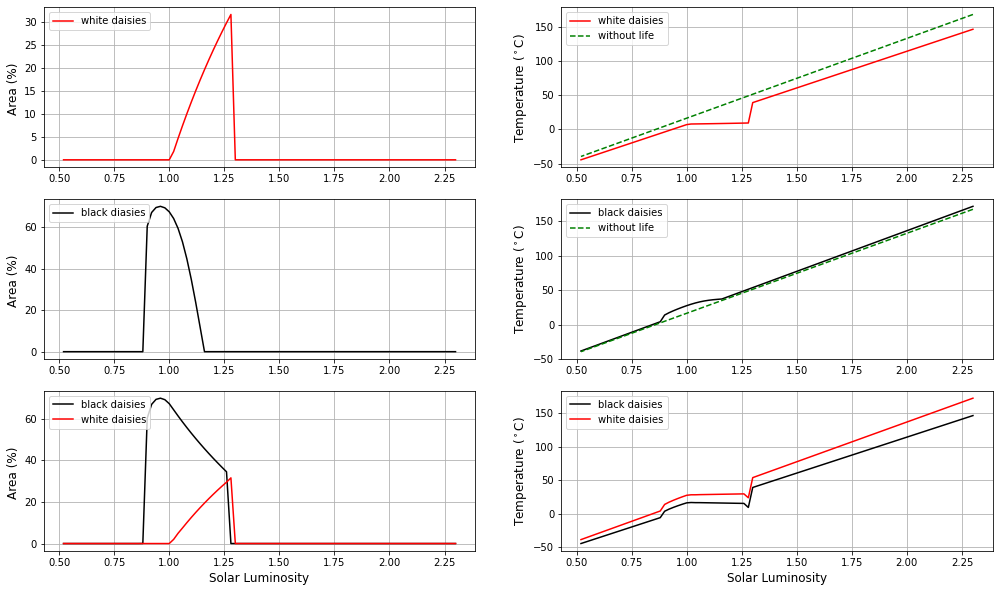

In [44]:
# Plots 
fig, axs = plt.subplots(3, 2,figsize=(17,10))
#axs[0,0].set_xlabel('solar luminosity',fontsize=12)
axs[0,0].set_ylabel('Area (%) ',fontsize=12)
axs[0,0].plot(L_ONLYWHITE, 100*area_white_vec_ONLYWHITE, color='red', label='white daisies')
axs[0,0].grid()
axs[0,0].legend(loc=2)

#axs[1,0].set_xlabel('solar luminosity',fontsize=12)
axs[1,0].set_ylabel('Area (%) ' ,fontsize=12)
axs[1,0].plot(L_ONLYBLACK, 100*area_black_vec_ONLYBLACK, color='black', label='black diasies')
axs[1,0].grid()
axs[1,0].legend(loc=2)

axs[2,0].set_xlabel('Solar Luminosity',fontsize=12)
axs[2,0].set_ylabel('Area (%) ',fontsize=12)
axs[2,0].plot(L, 100*area_black_vec, color='black', label='black daisies')
axs[2,0].plot(L, 100*area_white_vec, color='red', label='white daisies')
axs[2,0].grid()
axs[2,0].legend(loc=2)

#-------------------------------------------------
#axs[0,1].set_xlabel('solar luminosity',fontsize=12)
axs[0,1].set_ylabel('Temperature ($^\circ$C) ',fontsize=12)
axs[0,1].plot(L_ONLYWHITE, Tw_vec_ONLYWHITE - Kelvin_offset, color='red', label='white daisies')
axs[0,1].plot(L_NOLIFE, Tg_vec_NOLIFE - Kelvin_offset, 'g--', label='without life')
axs[0,1].grid()
axs[0,1].legend(loc=2)

#axs[1,1].set_xlabel('solar luminosity',fontsize=12)
axs[1,1].set_ylabel('Temperature ($^\circ$C)' ,fontsize=12)
axs[1,1].plot(L_ONLYBLACK, Tb_vec_ONLYBLACK - Kelvin_offset, color='black', label='black daisies')
axs[1,1].plot(L_NOLIFE, Tg_vec_NOLIFE - Kelvin_offset, 'g--', label='without life')
axs[1,1].grid()
axs[1,1].legend(loc=2)

axs[2,1].set_xlabel('Solar Luminosity',fontsize=12)
axs[2,1].set_ylabel('Temperature ($^\circ$C) ',fontsize=12)
axs[2,1].plot(L, Tw_vec - Kelvin_offset, color='black', label='black daisies')
axs[2,1].plot(L, Tb_vec - Kelvin_offset, color='red', label='white daisies')
#axs[2,1].plot(L, Tp_vec - Kelvin_offset, color='red', label='Planetary temperature')
#axs[2,1].plot(L_NOLIFE, Tg_vec_NOLIFE - Kelvin_offset, 'g--', label='without life')
axs[2,1].grid()
axs[2,1].legend(loc=2)

#fig.savefig('area_temp_warming.png')

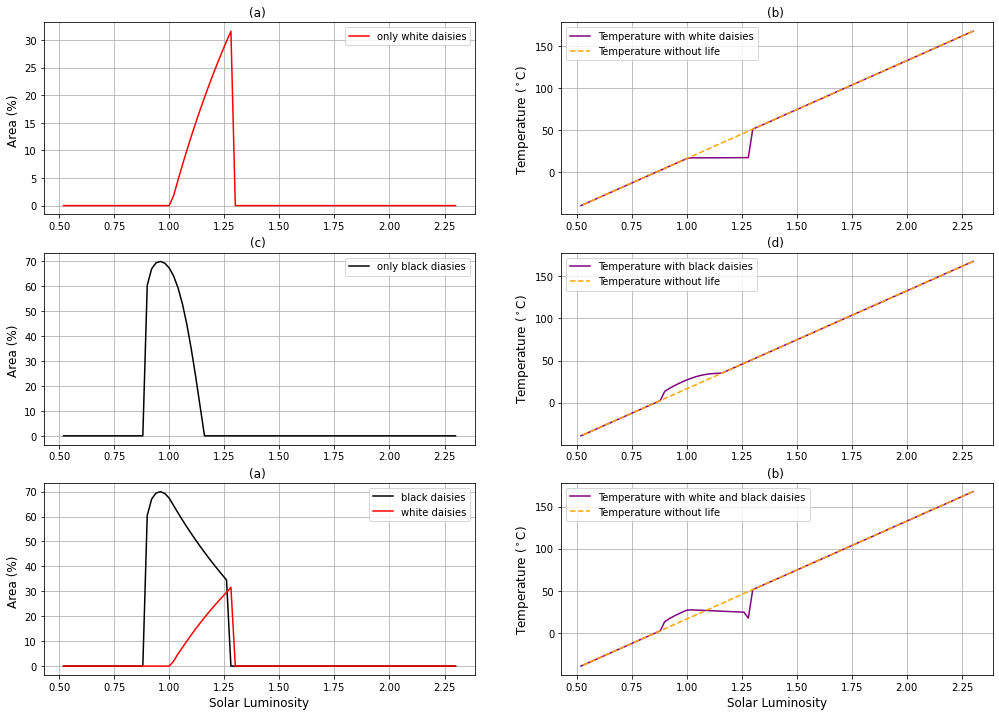

In [49]:
# Plots 
fig, axs = plt.subplots(3, 2,figsize=(17,12))
#axs[0,0].set_xlabel('solar luminosity',fontsize=12)
axs[0,0].set_ylabel('Area (%) ',fontsize=12)
axs[0,0].set_title('(a) ',fontsize=12)
axs[0,0].plot(L_ONLYWHITE, 100*area_white_vec_ONLYWHITE, color='red', label='only white daisies')
axs[0,0].grid()
axs[0,0].legend(loc=1)

#axs[1,0].set_xlabel('solar luminosity',fontsize=12)
axs[1,0].set_ylabel('Area (%) ' ,fontsize=12)
axs[1,0].set_title('(c) ',fontsize=12)
axs[1,0].plot(L_ONLYBLACK, 100*area_black_vec_ONLYBLACK, color='black', label='only black diasies')
axs[1,0].grid()
axs[1,0].legend(loc=1)

axs[2,0].set_xlabel('Solar Luminosity',fontsize=12)
axs[2,0].set_ylabel('Area (%) ',fontsize=12)
axs[2,0].set_title('(a) ',fontsize=12)
axs[2,0].plot(L, 100*area_black_vec, color='black', label='black daisies')
axs[2,0].plot(L, 100*area_white_vec, color='red', label='white daisies')
axs[2,0].grid()
axs[2,0].legend(loc=1)

#-------------------------------------------------
#axs[0,1].set_xlabel('solar luminosity',fontsize=12)
axs[0,1].set_ylabel('Temperature ($^\circ$C) ',fontsize=12)
axs[0,1].set_title('(b) ',fontsize=12)
axs[0,1].plot(L_ONLYWHITE, Tp_vec_ONLYWHITE - Kelvin_offset, color='purple', label='Temperature with white daisies')
axs[0,1].plot(L_NOLIFE, Tp_vec_NOLIFE - Kelvin_offset, linestyle='dashed',color='orange', label='Temperature without life')
axs[0,1].grid()
axs[0,1].legend(loc=2)

#axs[1,1].set_xlabel('solar luminosity',fontsize=12)
axs[1,1].set_ylabel('Temperature ($^\circ$C)' ,fontsize=12)
axs[1,1].set_title('(d) ',fontsize=12)
axs[1,1].plot(L_ONLYBLACK, Tp_vec_ONLYBLACK - Kelvin_offset, color='purple', label='Temperature with black daisies')
axs[1,1].plot(L_NOLIFE, Tp_vec_NOLIFE - Kelvin_offset,  linestyle='dashed',color='orange', label='Temperature without life')
axs[1,1].grid()
axs[1,1].legend(loc=2)

axs[2,1].set_xlabel('Solar Luminosity',fontsize=12)
axs[2,1].set_ylabel('Temperature ($^\circ$C) ',fontsize=12)
axs[2,1].set_title('(b) ',fontsize=12)
#axs[2,1].plot(L, Tw_vec - Kelvin_offset, color='black', label='black daisies')
#axs[2,1].plot(L, Tb_vec - Kelvin_offset, color='red', label='white daisies')
axs[2,1].plot(L, Tp_vec - Kelvin_offset, color='purple', label='Temperature with white and black daisies')
axs[2,1].plot(L_NOLIFE, Tp_vec_NOLIFE - Kelvin_offset,  linestyle='dashed',color='orange', label='Temperature without life')
axs[2,1].grid()
axs[2,1].legend(loc=2)

fig.savefig('area_temp_cooling.png')

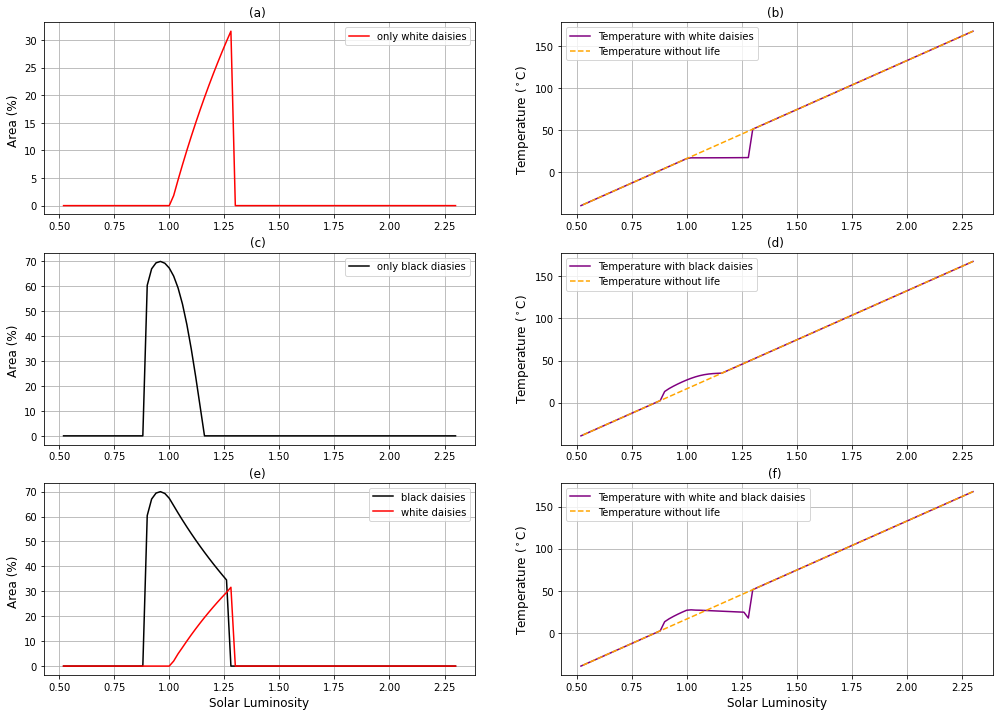

In [48]:

# Plots 
fig, axs = plt.subplots(3, 2,figsize=(17,12))
#axs[0,0].set_xlabel('solar luminosity',fontsize=12)
axs[0,0].set_ylabel('Area (%) ',fontsize=12)
axs[0,0].set_title('(a) ',fontsize=12)
axs[0,0].plot(L_ONLYWHITE, 100*area_white_vec_ONLYWHITE, color='red', label='only white daisies')
axs[0,0].grid()
axs[0,0].legend(loc=1)

#axs[1,0].set_xlabel('solar luminosity',fontsize=12)
axs[1,0].set_ylabel('Area (%) ' ,fontsize=12)
axs[1,0].set_title('(c) ',fontsize=12)
axs[1,0].plot(L_ONLYBLACK, 100*area_black_vec_ONLYBLACK, color='black', label='only black diasies')
axs[1,0].grid()
axs[1,0].legend(loc=1)

axs[2,0].set_xlabel('Solar Luminosity',fontsize=12)
axs[2,0].set_ylabel('Area (%) ',fontsize=12)
axs[2,0].set_title('(e) ',fontsize=12)
axs[2,0].plot(L, 100*area_black_vec, color='black', label='black daisies')
axs[2,0].plot(L, 100*area_white_vec, color='red', label='white daisies')
axs[2,0].grid()
axs[2,0].legend(loc=1)

#-------------------------------------------------
#axs[0,1].set_xlabel('solar luminosity',fontsize=12)
axs[0,1].set_ylabel('Temperature ($^\circ$C) ',fontsize=12)
axs[0,1].set_title('(b) ',fontsize=12)
axs[0,1].plot(L_ONLYWHITE, Tp_vec_ONLYWHITE - Kelvin_offset, color='purple', label='Temperature with white daisies')
axs[0,1].plot(L_NOLIFE, Tp_vec_NOLIFE - Kelvin_offset, linestyle='dashed',color='orange', label='Temperature without life')
axs[0,1].grid()
axs[0,1].legend(loc=2)

#axs[1,1].set_xlabel('solar luminosity',fontsize=12)
axs[1,1].set_ylabel('Temperature ($^\circ$C)' ,fontsize=12)
axs[1,1].set_title('(d) ',fontsize=12)
axs[1,1].plot(L_ONLYBLACK, Tp_vec_ONLYBLACK - Kelvin_offset, color='purple', label='Temperature with black daisies')
axs[1,1].plot(L_NOLIFE, Tp_vec_NOLIFE - Kelvin_offset,  linestyle='dashed',color='orange', label='Temperature without life')
axs[1,1].grid()
axs[1,1].legend(loc=2)

axs[2,1].set_xlabel('Solar Luminosity',fontsize=12)
axs[2,1].set_ylabel('Temperature ($^\circ$C) ',fontsize=12)
axs[2,1].set_title('(f) ',fontsize=12)
#axs[2,1].plot(L, Tw_vec - Kelvin_offset, color='black', label='black daisies')
#axs[2,1].plot(L, Tb_vec - Kelvin_offset, color='red', label='white daisies')
axs[2,1].plot(L, Tp_vec - Kelvin_offset, color='purple', label='Temperature with white and black daisies')
axs[2,1].plot(L_NOLIFE, Tp_vec_NOLIFE - Kelvin_offset,  linestyle='dashed',color='orange', label='Temperature without life')
axs[2,1].grid()
axs[2,1].legend(loc=2)


### Daisies' population stucture for different luminosities (Map plot)

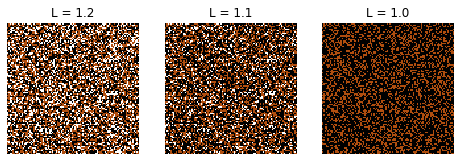

In [171]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np


fig, axs = plt.subplots(1, 3,figsize=(8,5))

p_white = area_white_vec[len(L)-35]
p_black = area_black_vec[len(L)-35]
np.random.seed(101) # this generates the same output every time.
zvals = np.random.rand(100, 100) * 1  # return a sample from the “standard normal” distribution.

# make a color map of fixed colors
cmap = colors.ListedColormap(['white', 'black', 'xkcd:burnt sienna'])
bounds=[0,p_white,p_black+p_white,1] # points which are < p_white will be colored white
                                        # points which are > p_white and < p_black+p_white will be colored black
norm = colors.BoundaryNorm(bounds, cmap.N)

# tell imshow about color map so that only set colors are used
axs[0].set_title('L = 1.2')
axs[0].axis('off')
img = axs[0].imshow(zvals, interpolation='nearest', origin='lower',
                    cmap=cmap, norm=norm)
# make a color bar
#plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=[0, 5, 10])

######################################################
p_white = area_white_vec[len(L)-30]
p_black = area_black_vec[len(L)-30]
np.random.seed(101)
zvals = np.random.rand(100, 100) * 1

# make a color map of fixed colors
cmap = colors.ListedColormap(['white', 'black', 'xkcd:burnt sienna'])
bounds=[0,p_white,p_black+p_white,1]
norm = colors.BoundaryNorm(bounds, cmap.N)

# tell imshow about color map so that only set colors are used
axs[1].set_title('L = 1.1')
axs[1].axis('off')
img = axs[1].imshow(zvals, interpolation='nearest', origin='lower',
                    cmap=cmap, norm=norm)

######################################################
p_white = area_white_vec[len(L)-25]
p_black = area_black_vec[len(L)-25]
np.random.seed(101)
zvals = np.random.rand(100, 100) * 1

# make a color map of fixed colors
cmap = colors.ListedColormap(['white', 'black', 'xkcd:burnt sienna'])
bounds=[0,p_white,p_black+p_white,1]
norm = colors.BoundaryNorm(bounds, cmap.N)

# tell imshow about color map so that only set colors are used
axs[2].set_title('L = 1.0')
axs[2].axis('off')
img = axs[2].imshow(zvals, interpolation='nearest', origin='lower',
                    cmap=cmap, norm=norm)

'''
######################################################
p_white = area_white_vec[len(L)-20]
p_black = area_black_vec[len(L)-20]
np.random.seed(101)
zvals = np.random.rand(100, 100) * 1

# make a color map of fixed colors
cmap = colors.ListedColormap(['white', 'black', 'xkcd:burnt sienna'])
bounds=[0,p_white,p_black+p_white,1]
norm = colors.BoundaryNorm(bounds, cmap.N)

# tell imshow about color map so that only set colors are used
axs[3].set_title('L = 0.9')
axs[3].axis('off')
img = axs[3].imshow(zvals, interpolation='nearest', origin='lower',
                    cmap=cmap, norm=norm)


######################################################
p_white = area_white_vec[len(L)-15]
p_black = area_black_vec[len(L)-15]
np.random.seed(101)
zvals = np.random.rand(100, 100) * 1

# make a color map of fixed colors
cmap = colors.ListedColormap(['white', 'black', 'xkcd:burnt sienna'])
bounds=[0,p_white,p_black+p_white,1]
norm = colors.BoundaryNorm(bounds, cmap.N)

# tell imshow about color map so that only set colors are used
axs[4].set_title('L = 0.8')
axs[4].axis('off')
img = axs[4].imshow(zvals, interpolation='nearest', origin='lower',
                    cmap=cmap, norm=norm)
'''
plt.show()

fig.savefig('population_cooling.png')

## Grey daisies

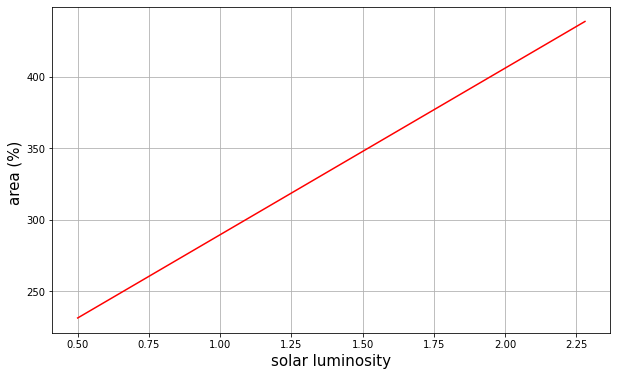

In [31]:
#Without life
# Constants 
b = 2.2         # W m-2 K-1
beta_coef=16    # W m-2 K-1
Ι0 = 220

# Temperatures
Kelvin_offset = 273.15
T_min = 5 + Kelvin_offset
T_max = 40 + Kelvin_offset
T_ideal = 22.5 + Kelvin_offset

#Rates
gamma = 0.3 # death rate s-1

# Albedo
alb_ground = 0.25

#Area (%)
area_ground = 1

# Flux terms
S = 1366  #Solar flux constant  W m-2
sigma = 5.67032e-8 # Stefab-boltzman constant W m-2 K-4

# Flux limits and step
L_min = 0.5
L_max = 2.3
L_step = 0.02

# Arrays
L_NOLIFE = np.arange(L_min, L_max, L_step)
Tp_vec_NOLIFE = np.zeros(len(L_NOLIFE)) # planetary temperature 
Tg_vec_NOLIFE = np.zeros(len(L_NOLIFE)) # local temperature - white

for i in range(len(L_NOLIFE)):       
    # Planetary albedo
    alb_planetary = area_ground*alb_ground

    # Planetary temperature
    Tp_vec_NOLIFE[i] = (0.25*S*L_NOLIFE[i]*(1-alb_planetary)-Ι0)/(b) + Kelvin_offset# Kelvin or Celsius? 

    # Local temperatures
    Tg_vec_NOLIFE[i] = S*L_NOLIFE[i]*(alb_planetary-alb_ground)/(4*(b + beta_coef)) + Tp_vec_NOLIFE[i] # Kelvin or Celsius?
# end of for loop

# Plots 
fig = plt.figure(figsize=(10,6))
plt.xlabel('solar luminosity',fontsize=15)
plt.ylabel('area (%) ',fontsize=15)
plt.plot(L_NOLIFE, Tg_vec_NOLIFE, color='red')
plt.grid()


In [34]:
# Constants 
b = 2.2         # W m-2 K-1
beta_coef=16    # W m-2 K-1
Ι0 = 220

# Temperatures
Kelvin_offset = 273.15
T_min = 5 + Kelvin_offset
T_max = 40 + Kelvin_offset
T_ideal = 22.5 + Kelvin_offset

# Albedo
alb_white = 0.75
alb_grey   = 0.45
alb_black = 0.15
alb_ground = 0.25

#Area (%)
area_black = 0.01
area_white = 0.01
area_grey = 0.01 

#Rates
gamma = 0.3 # death rate s-1

# Flux terms
S = 1366  #Solar flux constant  W m-2
sigma = 5.67032e-8 # Stefab-boltzman constant W m-2 K-4

# Flux limits and step
L_min = 0.5
L_max = 2.3
L_step = 0.02

# Arrays
L = np.arange(L_min, L_max, L_step)
area_black_vec = np.zeros(len(L))
area_white_vec = np.zeros(len(L))
area_ground_vec = np.zeros(len(L))
area_grey_vec = np.zeros(len(L))  
Tp_vec = np.zeros(len(L)) # planetary temperature 
Tw_vec = np.zeros(len(L)) # local temperature - white
Tb_vec = np.zeros(len(L)) # local temperature - black
Tg_vec = np.zeros(len(L)) # local temperature - grey
total_time = np.zeros(len(L)) # time that daisies need to reach the steady state

#_______________________________ FUNCTIONS ___________________________________#
# We had to define them again since we add another species into the equations

# Functions
def fw(area_white, area_black, area_grey, S, L):
    
    area_ground = 1 - (area_black + area_white + area_grey)
    
    # Planetary albedo
    alb_planetary = area_ground * alb_ground + area_white * alb_white + area_black * alb_black + area_grey * alb_grey
    
   
    # Planetary temperature
    Tp = (0.25*S*L*(1-alb_planetary)-Ι0)/(b) + Kelvin_offset # Kelvin or Celsius? 

    # Local temperatures
    Tw = S*L*(alb_planetary-alb_white)/(4*(b + beta_coef)) + Tp # Kelvin or Celsius?

    # Determine birth rates
    if (Tw >= T_min and Tw <= T_max and (area_white) >= 0.01): 
        beta_white = 1 - 4*np.power(T_ideal - Tw, 2)/(np.power(T_max - T_min, 2))
    else:
        beta_white = 0
        
    return area_white*(area_ground*beta_white - gamma)


def fb(area_white, area_black, area_grey, S, L):
    
    area_ground = 1 - (area_black + area_white + area_grey)

    # Planetary albedo
    alb_planetary = area_ground*alb_ground + area_white*alb_white + area_black*alb_black + area_grey * alb_grey

    # Planetary temperature
    Tp = (0.25*S*L*(1-alb_planetary)-Ι0)/(b) + Kelvin_offset # Kelvin or Celsius? 

    # Local temperatures
    Tb = S*L*(alb_planetary-alb_black)/(4*(b + beta_coef)) + Tp # Kelvin or Celsius?

    # Determine birth rates
    if (Tb >= T_min and Tb <= T_max and (area_black) >= 0.01): 
        beta_black = 1 - 4*np.power(T_ideal - Tb, 2)/(np.power(T_max - T_min, 2))
    else:
        beta_black = 0
        
    return area_black*(area_ground*beta_black - gamma)

# Functions
def fg(area_white, area_black, area_grey, S, L):
    
    area_ground = 1 - (area_black + area_white + area_grey)
    
    # Planetary albedo
    alb_planetary = area_ground * alb_ground + area_white * alb_white + area_black * alb_black + area_grey * alb_grey
   
    # Planetary temperature
    Tp = (0.25*S*L*(1-alb_planetary)-Ι0)/(b) + Kelvin_offset # Kelvin or Celsius? 

    # Local temperatures
    Tg = S*L*(alb_planetary-alb_grey)/(4*(b + beta_coef)) + Tp # Kelvin or Celsius?

    # Determine birth rates
    if (Tg >= T_min and Tg <= T_max and (area_grey) >= 0.01): 
        beta_grey = 1 - 4*np.power(T_ideal - Tg, 2)/(np.power(T_max - T_min, 2))
    else:
        beta_grey = 0
        
    return area_grey*(area_ground*beta_grey - gamma)

# Runge-kutta method
def rk4(area_white, area_black, area_grey, S, L, h):  
    k0 = h*fw(area_white, area_black, area_grey, S, L)
    l0 = h*fb(area_white, area_black, area_grey, S, L)     
    m0 = h*fg(area_white, area_black, area_grey, S, L)       
    k1 = h*fw(area_white+k0/2, area_black+l0/2, area_grey+m0/2, S, L)
    l1 = h*fb(area_white+k0/2, area_black+l0/2, area_grey+m0/2, S, L)     
    m1 = h*fg(area_white+k0/2, area_black+l0/2, area_grey+m0/2, S, L)      
    k2 = h*fw(area_white+k1/2, area_black+l1/2, area_grey+m1/2, S, L)
    l2 = h*fb(area_white+k1/2, area_black+l1/2, area_grey+m1/2, S, L)  
    m2 = h*fg(area_white+k1/2, area_black+l1/2, area_grey+m1/2, S, L)                                  
    k3 = h*fw(area_white+k2, area_black+l2, area_grey+m2, S, L)
    l3 = h*fb(area_white+k2, area_black+l2, area_grey+m2, S, L)  
    m3 = h*fg(area_white+k2, area_black+l2, area_grey+m2, S, L)                    
    area_white_new = area_white + (1/6)*(k0+2*k1+2*k2+k3) 
    area_black_new = area_black + (1/6)*(l0+2*l1+2*l2+l3)         
    area_grey_new = area_grey + (1/6)*(m0+2*m1+2*m2+m3)       
    
    return  area_white_new, area_black_new, area_grey_new


dt=0.1 # time-step
tol=1e-8  # tolerance

area_black = 0.01
area_white = 0.01
area_grey = 0.01

area_b_old = 0
area_w_old = 0
area_g_old = 0

for i in range(len(L)):
    
    # Initial Area (%)
    area_black = max(area_b_old,0.01)
    area_white = max(area_w_old,0.01)
    area_grey = max(area_g_old,0.01)
    area_ground = 1 - (area_black + area_white + area_grey)
    
    # Initial time
    t=0
    
    # Choose an initial tolerance randomly
    darea_b_tol = 1
    darea_w_tol = 1
    darea_g_tol = 1
    
    ###
    area_b_old = 0
    area_w_old = 0
    area_g_old = 0
    

    while darea_w_tol > tol and darea_b_tol > tol and darea_g_tol > tol:
        
        # Planetary albedo
        alb_planetary = area_ground*alb_ground + area_white*alb_white + area_black*alb_black + area_grey*alb_grey 
        
        # Planetary temperature
        Tp_vec[i] = (0.25*S*L[i]*(1-alb_planetary)-Ι0)/(b) + Kelvin_offset # Kelvin or Celsius? 
        
        # Local temperatures
        Tw_vec[i] = S*L[i]*(alb_planetary-alb_white)/(4*(b + beta_coef)) + Tp_vec[i] # Kelvin or Celsius?
        Tb_vec[i] = S*L[i]*(alb_planetary-alb_black)/(4*(b + beta_coef)) + Tp_vec[i] # Kelvin or Celsius?
        Tg_vec[i] = S*L[i]*(alb_planetary-alb_grey)/(4*(b + beta_coef)) + Tp_vec[i] # Kelvin or Celsius?

        # Determine birth rates
        if (Tw_vec[i] >= T_min and Tw_vec[i] <= T_max and (area_white) >= 0.01):
            beta_white = 1 - 4*np.power(T_ideal - Tw_vec[i], 2)/(np.power(T_max - T_min, 2))
        else:
            beta_white = 0

        if (Tb_vec[i] >= T_min and Tb_vec[i] <= T_max and area_black >= 0.01):
            beta_black = 1 - 4*np.power(T_ideal - Tb_vec[i], 2)/(np.power(T_max - T_min, 2))
        else:
            beta_black = 0
        
        if (Tg_vec[i] >= T_min and Tg_vec[i] <= T_max and (area_grey) >= 0.01): 
            beta_grey = 1 - 4*np.power(T_ideal - Tg_vec[i], 2)/(np.power(T_max - T_min, 2))
        else:
            beta_grey = 0
        
        # New areas 
        area_white, area_black, area_grey = rk4(area_white, area_black, area_grey, S, L[i], dt)
        area_ground = 1 - area_white - area_black - area_grey
        
        # New tolerance
        darea_b_tol = abs(area_black - area_b_old)
        darea_w_tol = abs(area_white - area_w_old)
        darea_g_tol = abs(area_grey - area_g_old)
           
        # for the next iteration 
        area_b_old = area_black
        area_w_old = area_white
        area_g_old = area_grey
        
        # Time
        t=t+dt
        
        # end of while loop
            
    # Save states 
    area_white_vec[i]  = area_white
    area_black_vec[i]  = area_black
    area_grey_vec[i] = area_grey
    area_ground_vec[i] = area_ground
    total_time[i] = t

    

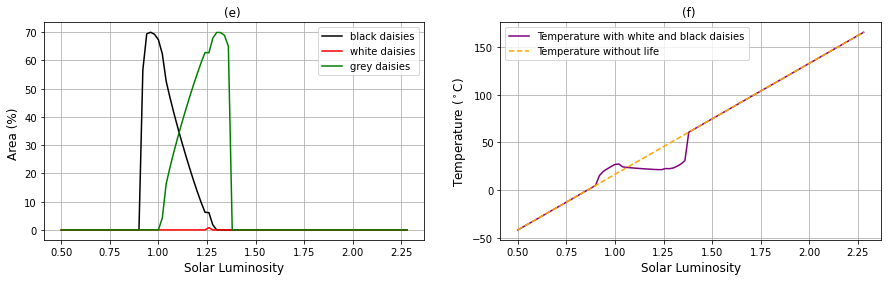

In [35]:
# Plots 
fig, axs = plt.subplots(1, 2,figsize=(15,4))
axs[0].set_xlabel('Solar Luminosity',fontsize=12)
axs[0].set_ylabel('Area (%) ',fontsize=12)
axs[0].set_title('(e) ',fontsize=12)
axs[0].plot(L, 100*area_black_vec, color='black', label='black daisies')
axs[0].plot(L, 100*area_white_vec, color='red', label='white daisies')
axs[0].plot(L, 100*area_grey_vec, color='green', label='grey daisies')
axs[0].grid()
axs[0].legend(loc=1)

axs[1].set_xlabel('Solar Luminosity',fontsize=12)
axs[1].set_ylabel('Temperature ($^\circ$C) ',fontsize=12)
axs[1].set_title('(f) ',fontsize=12)
#axs[1].plot(L, Tw_vec - Kelvin_offset, color='black', label='black daisies')
#axs[1].plot(L, Tb_vec - Kelvin_offset, color='red', label='white daisies')
axs[1].plot(L, Tp_vec - Kelvin_offset, color='purple', label='Temperature with white and black daisies')
axs[1].plot(L_NOLIFE, Tp_vec_NOLIFE - Kelvin_offset,  linestyle='dashed',color='orange', label='Temperature without life')
axs[1].grid()
axs[1].legend(loc=2)